In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor
import pickle  
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix, roc_curve, roc_auc_score
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [5]:
train_data = pd.read_csv('termdeposit_train.csv')
test_data = pd.read_csv('termdeposit_test.csv')

In [6]:
train_data.shape

(31647, 18)

In [7]:
train_data.head(50)

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,26110,56,admin.,married,unknown,no,1933,no,no,telephone,19,nov,44,2,-1,0,unknown,no
1,40576,31,unknown,married,secondary,no,3,no,no,cellular,20,jul,91,2,-1,0,unknown,no
2,15320,27,services,married,secondary,no,891,yes,no,cellular,18,jul,240,1,-1,0,unknown,no
3,43962,57,management,divorced,tertiary,no,3287,no,no,cellular,22,jun,867,1,84,3,success,yes
4,29842,31,technician,married,secondary,no,119,yes,no,cellular,4,feb,380,1,-1,0,unknown,no
5,29390,33,management,single,tertiary,no,0,yes,no,cellular,2,feb,116,3,-1,0,unknown,no
6,40444,56,retired,married,secondary,no,1044,no,no,telephone,3,jul,353,2,-1,0,unknown,yes
7,40194,50,technician,single,secondary,no,1811,no,no,cellular,8,jun,97,4,-1,0,unknown,no
8,29824,45,blue-collar,divorced,secondary,no,1951,yes,no,cellular,4,feb,692,1,-1,0,unknown,no
9,44676,35,admin.,married,secondary,no,1204,no,no,cellular,3,sep,789,2,-1,0,unknown,no


In [8]:
train_data.describe

<bound method NDFrame.describe of           ID  age         job   marital  education default  balance housing  \
0      26110   56      admin.   married    unknown      no     1933      no   
1      40576   31     unknown   married  secondary      no        3      no   
2      15320   27    services   married  secondary      no      891     yes   
3      43962   57  management  divorced   tertiary      no     3287      no   
4      29842   31  technician   married  secondary      no      119     yes   
...      ...  ...         ...       ...        ...     ...      ...     ...   
31642  36483   29  management    single   tertiary      no        0     yes   
31643  40178   53  management  divorced   tertiary      no      380      no   
31644  19710   32  management    single   tertiary      no      312      no   
31645  38556   57  technician   married  secondary      no      225     yes   
31646  14156   55  management  divorced  secondary      no      204     yes   

      loan    con

In [9]:
train_data.info

<bound method DataFrame.info of           ID  age         job   marital  education default  balance housing  \
0      26110   56      admin.   married    unknown      no     1933      no   
1      40576   31     unknown   married  secondary      no        3      no   
2      15320   27    services   married  secondary      no      891     yes   
3      43962   57  management  divorced   tertiary      no     3287      no   
4      29842   31  technician   married  secondary      no      119     yes   
...      ...  ...         ...       ...        ...     ...      ...     ...   
31642  36483   29  management    single   tertiary      no        0     yes   
31643  40178   53  management  divorced   tertiary      no      380      no   
31644  19710   32  management    single   tertiary      no      312      no   
31645  38556   57  technician   married  secondary      no      225     yes   
31646  14156   55  management  divorced  secondary      no      204     yes   

      loan    conta

In [10]:
train_data.drop('ID',axis=1,inplace=True)

In [11]:
train_data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,56,admin.,married,unknown,no,1933,no,no,telephone,19,nov,44,2,-1,0,unknown,no
1,31,unknown,married,secondary,no,3,no,no,cellular,20,jul,91,2,-1,0,unknown,no
2,27,services,married,secondary,no,891,yes,no,cellular,18,jul,240,1,-1,0,unknown,no
3,57,management,divorced,tertiary,no,3287,no,no,cellular,22,jun,867,1,84,3,success,yes
4,31,technician,married,secondary,no,119,yes,no,cellular,4,feb,380,1,-1,0,unknown,no


In [12]:
test_data.head()

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,38441,32,services,married,secondary,no,118,yes,no,cellular,15,may,20,6,-1,0,unknown
1,40403,78,retired,divorced,primary,no,2787,no,no,telephone,1,jul,372,1,-1,0,unknown
2,3709,31,self-employed,single,tertiary,no,144,yes,no,unknown,16,may,676,1,-1,0,unknown
3,37422,57,services,single,primary,no,3777,yes,no,telephone,13,may,65,2,-1,0,unknown
4,12527,45,blue-collar,divorced,secondary,no,-705,no,yes,unknown,3,jul,111,1,-1,0,unknown


In [13]:
test_data.drop('ID',axis=1,inplace=True)

In [14]:
test_data.head()


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,32,services,married,secondary,no,118,yes,no,cellular,15,may,20,6,-1,0,unknown
1,78,retired,divorced,primary,no,2787,no,no,telephone,1,jul,372,1,-1,0,unknown
2,31,self-employed,single,tertiary,no,144,yes,no,unknown,16,may,676,1,-1,0,unknown
3,57,services,single,primary,no,3777,yes,no,telephone,13,may,65,2,-1,0,unknown
4,45,blue-collar,divorced,secondary,no,-705,no,yes,unknown,3,jul,111,1,-1,0,unknown


In [15]:
from sklearn.preprocessing import LabelEncoder
lab_enc=LabelEncoder( )


In [16]:
categorical_features = ['job', 'marital', 'education','default','housing','loan','contact','month','poutcome']


for feature in categorical_features:
    train_data[feature] = lab_enc.fit_transform(train_data[feature])
    test_data[feature] = lab_enc.fit_transform(test_data[feature])

In [17]:
train_data.head(80)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,56,0,1,3,0,1933,0,0,1,19,9,44,2,-1,0,3,no
1,31,11,1,1,0,3,0,0,0,20,5,91,2,-1,0,3,no
2,27,7,1,1,0,891,1,0,0,18,5,240,1,-1,0,3,no
3,57,4,0,2,0,3287,0,0,0,22,6,867,1,84,3,2,yes
4,31,9,1,1,0,119,1,0,0,4,3,380,1,-1,0,3,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75,39,1,2,0,0,-491,0,1,2,5,6,179,1,-1,0,3,no
76,54,4,0,2,0,0,1,0,0,7,8,199,1,297,3,0,no
77,33,4,2,2,0,224,0,0,0,8,7,241,2,-1,0,3,yes
78,34,1,2,1,0,381,1,0,2,12,8,102,1,-1,0,3,no


ValueError: num must be 1 <= num <= 15, not 16

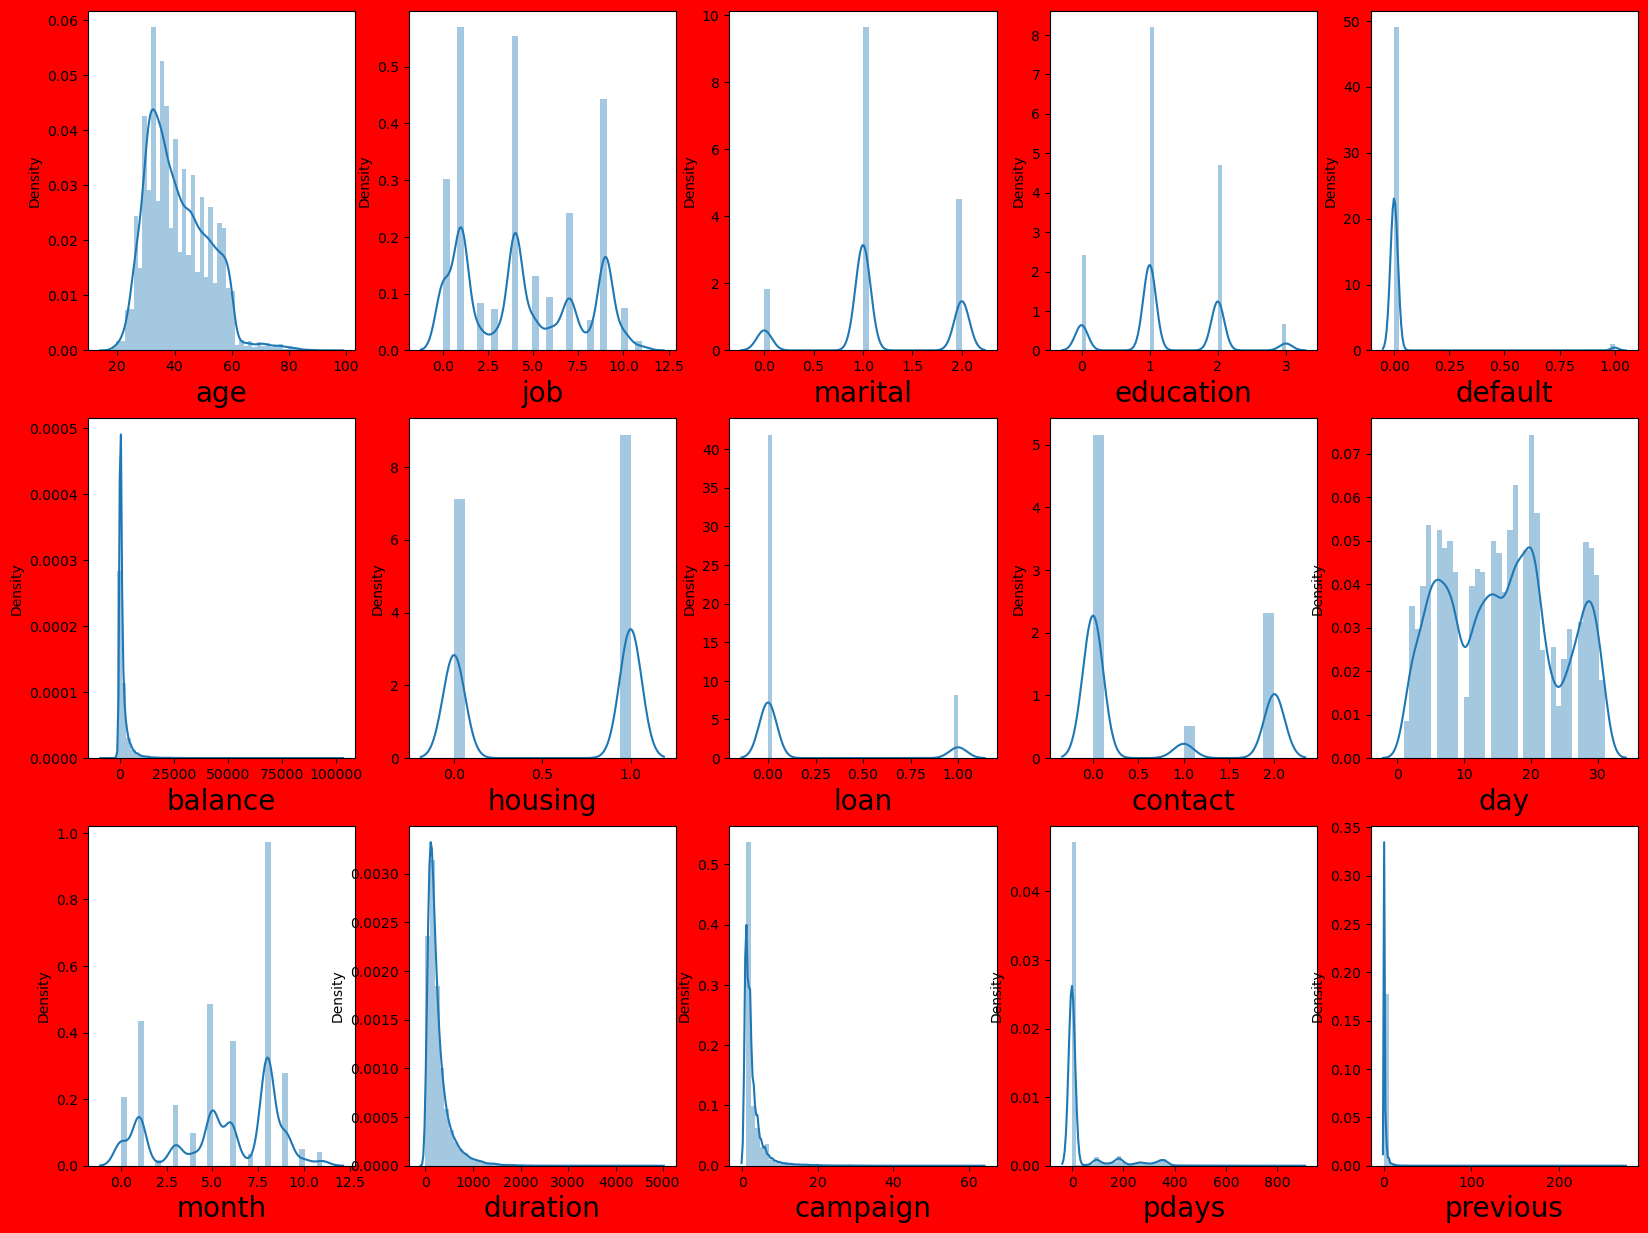

In [21]:
plt.figure(figsize=(20,15), facecolor='red')
plotnumber=1
for column in train_data:
      if plotnumber<=17:
        ax=plt.subplot(3,5,plotnumber)
        sns.distplot(train_data[column])
        plt.xlabel(column, fontsize=20)
        plotnumber+=1
plt.show( )


In [ ]:
train_data.describe()

In [182]:
train_data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,56,0,1,3,0,1933,0,0,1,19,9,44,2,-1,0,3,no
1,31,11,1,1,0,3,0,0,0,20,5,91,2,-1,0,3,no
2,27,7,1,1,0,891,1,0,0,18,5,240,1,-1,0,3,no
3,57,4,0,2,0,3287,0,0,0,22,6,867,1,84,3,2,yes
4,31,9,1,1,0,119,1,0,0,4,3,380,1,-1,0,3,no


In [183]:
Y_train=train_data['subscribed']
print(Y)


0         no
1         no
2         no
3        yes
4         no
        ... 
31642     no
31643    yes
31644     no
31645     no
31646    yes
Name: subscribed, Length: 31647, dtype: object


In [184]:
test_data.head()

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,38441,32,7,1,1,0,118,1,0,0,15,8,20,6,-1,0,3
1,40403,78,5,0,0,0,2787,0,0,1,1,5,372,1,-1,0,3
2,3709,31,6,2,2,0,144,1,0,2,16,8,676,1,-1,0,3
3,37422,57,7,2,0,0,3777,1,0,1,13,8,65,2,-1,0,3
4,12527,45,1,0,1,0,-705,0,1,2,3,5,111,1,-1,0,3


In [185]:
test_data.drop(columns=['ID'])

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,32,7,1,1,0,118,1,0,0,15,8,20,6,-1,0,3
1,78,5,0,0,0,2787,0,0,1,1,5,372,1,-1,0,3
2,31,6,2,2,0,144,1,0,2,16,8,676,1,-1,0,3
3,57,7,2,0,0,3777,1,0,1,13,8,65,2,-1,0,3
4,45,1,0,1,0,-705,0,1,2,3,5,111,1,-1,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13559,39,4,1,2,0,45,0,0,0,28,1,148,4,-1,0,3
13560,54,1,1,0,0,2281,1,0,2,20,6,158,1,-1,0,3
13561,35,5,1,0,0,285,1,0,0,29,4,136,1,-1,0,3
13562,29,0,2,1,0,464,0,0,0,9,9,208,2,91,3,2


In [191]:
X_train=train_data.drop(columns=['subscribed'])
print(X_train)

       age  job  marital  education  default  balance  housing  loan  contact  \
0       56    0        1          3        0     1933        0     0        1   
1       31   11        1          1        0        3        0     0        0   
2       27    7        1          1        0      891        1     0        0   
3       57    4        0          2        0     3287        0     0        0   
4       31    9        1          1        0      119        1     0        0   
...    ...  ...      ...        ...      ...      ...      ...   ...      ...   
31642   29    4        2          2        0        0        1     0        0   
31643   53    4        0          2        0      380        0     1        0   
31644   32    4        2          2        0      312        0     0        0   
31645   57    9        1          1        0      225        1     0        1   
31646   55    4        0          1        0      204        1     0        0   

       day  month  duration

In [187]:
model = RandomForestClassifier()

In [188]:
model.fit(X_train, y_train)

RandomForestClassifier()

In [195]:
X_test=test_data
print(X_test)

       age  job  marital  education  default  balance  housing  loan  contact  \
0       32    7        1          1        0      118        1     0        0   
1       78    5        0          0        0     2787        0     0        1   
2       31    6        2          2        0      144        1     0        2   
3       57    7        2          0        0     3777        1     0        1   
4       45    1        0          1        0     -705        0     1        2   
...    ...  ...      ...        ...      ...      ...      ...   ...      ...   
13559   39    4        1          2        0       45        0     0        0   
13560   54    1        1          0        0     2281        1     0        2   
13561   35    5        1          0        0      285        1     0        0   
13562   29    0        2          1        0      464        0     0        0   
13563   29    0        1          1        0        2        1     0        0   

       day  month  duration

In [196]:
y_pred = model.predict(X_test)

In [198]:
print(y_pred)

['no' 'no' 'no' ... 'no' 'yes' 'no']
